In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.shape

(21613, 21)

#### Missing values

In [6]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>1]

for feature in features_with_na:
    print('{}: {}% missing values.'.format(feature, np.round(data[feature].isnull().mean(),4)))

No missing values are observed in the dataset.

In [7]:
numerical_features = [features for features in data.columns if data[features].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  20


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
numerical_features

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [9]:
year_feature = [features for features in numerical_features if 'yr'.lower() in features.lower()]

year_feature

['yr_built', 'yr_renovated']

In [10]:
# let's explore the content of these year variables
for feature in year_feature:
    print('Unique values in feature \'{}\' with count {}: {}'.format(feature, len(data[feature].unique()), data[feature].unique()))
    print()

Unique values in feature 'yr_built' with count 116: [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]

Unique values in feature 'yr_renovated' with count 70: [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 19

Text(0.5, 1.0, 'House Price vs Year built')

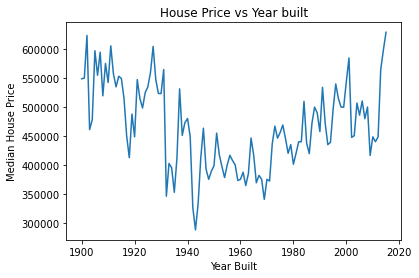

In [11]:
data.groupby('yr_built')['price'].median().plot()
plt.xlabel('Year Built')
plt.ylabel('Median House Price')
plt.title("House Price vs Year built") 

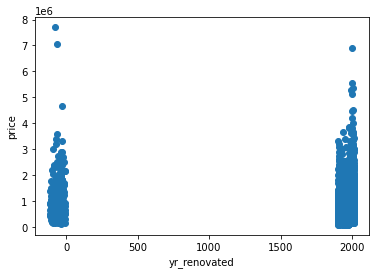

In [12]:
for feature in year_feature:
    if feature != 'yr_built':
        dataset = data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        dataset[feature] = dataset['yr_built'] - dataset[feature]
        
        plt.scatter(dataset[feature],dataset['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.show()

In [13]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


In [14]:
discrete_feature

['bedrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [15]:
data[discrete_feature].head()

,bedrooms,floors,waterfront,view,condition,grade
0,3,1.0,0,0,3,7
1,3,2.0,0,0,3,7
2,2,1.0,0,0,3,6
3,4,1.0,0,0,5,7
4,3,1.0,0,0,3,8


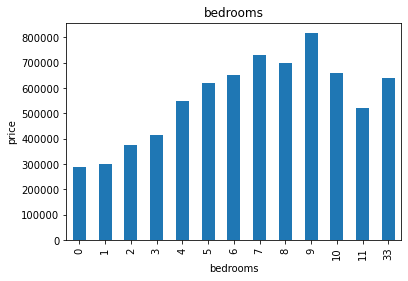

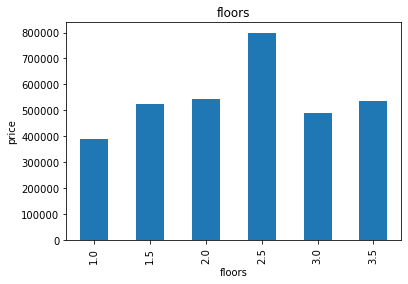

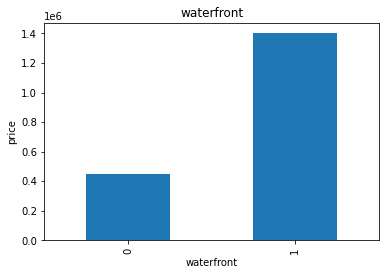

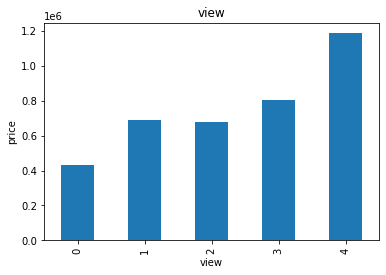

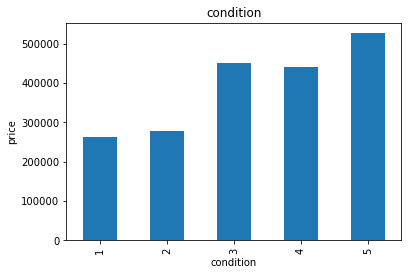

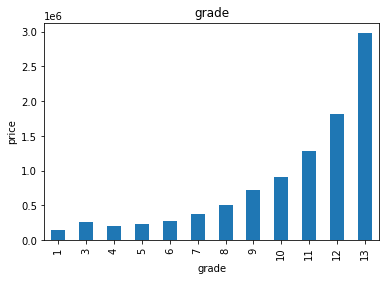

In [16]:
for feature in discrete_feature:
    dataset=data.copy()
    dataset.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [17]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


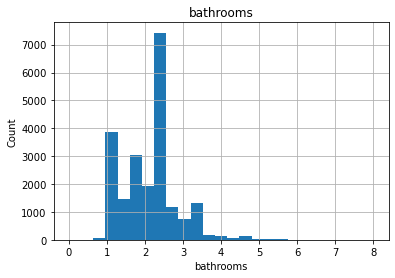

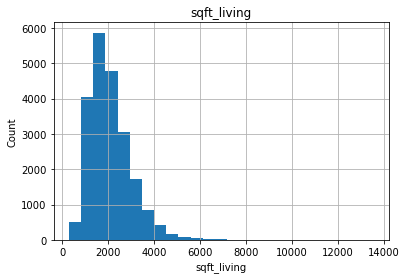

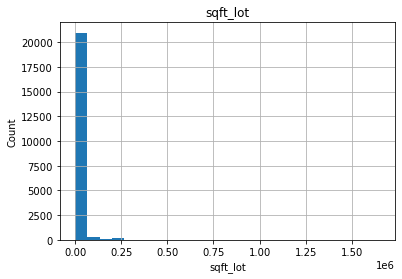

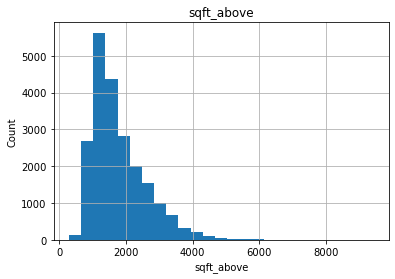

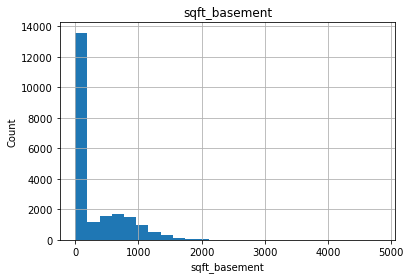

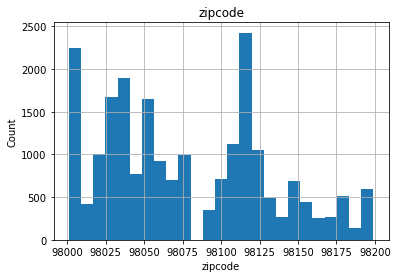

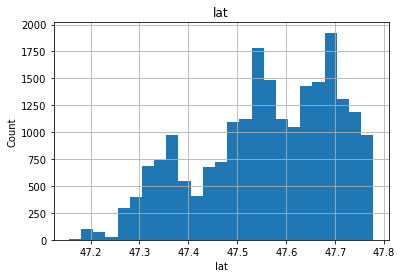

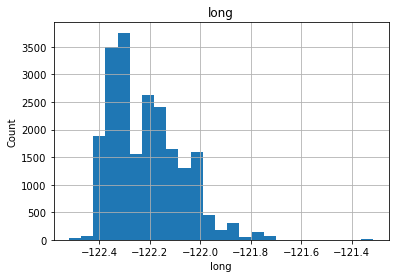

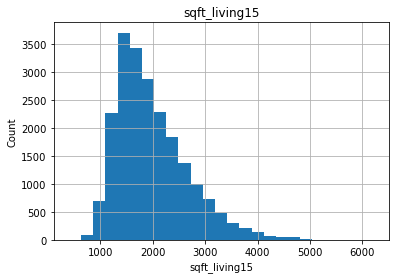

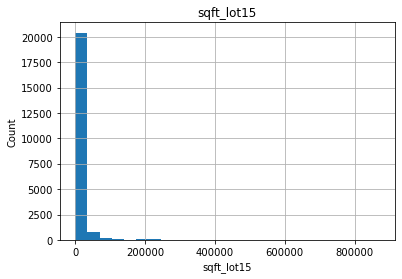

In [18]:
for feature in continuous_feature:
    if feature != 'id' and feature != 'price':
        dataset=data.copy()
        dataset[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()

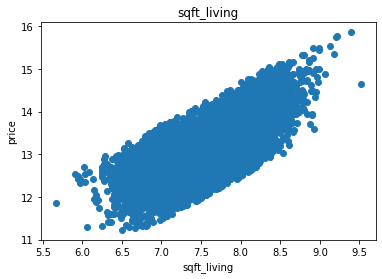

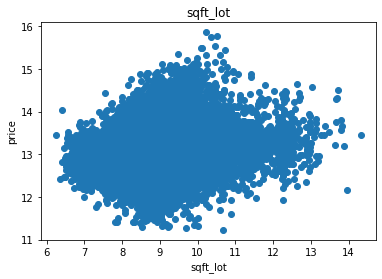

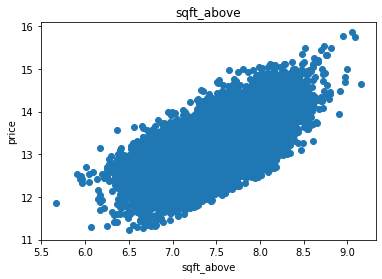

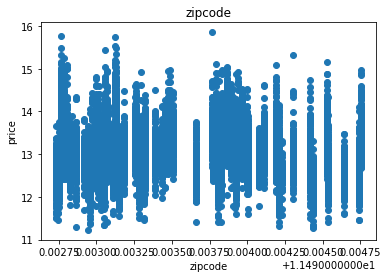

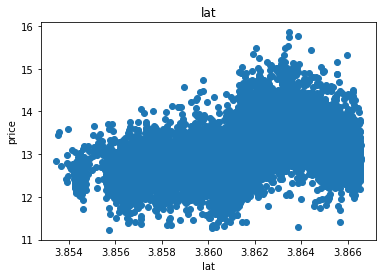

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


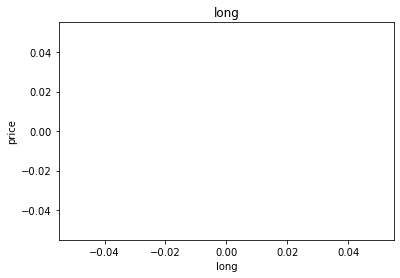

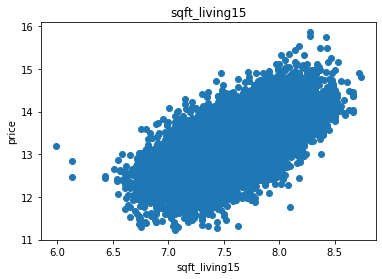

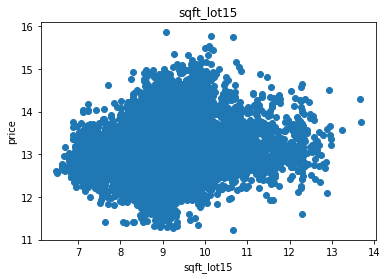

In [19]:
for feature in continuous_feature:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        if feature != 'id' and feature != 'price':
            dataset[feature]=np.log(dataset[feature])
            dataset['price']=np.log(dataset['price'])
            plt.scatter(dataset[feature],dataset['price'])
            plt.xlabel(feature)
            plt.ylabel('price')
            plt.title(feature)
            plt.show() 

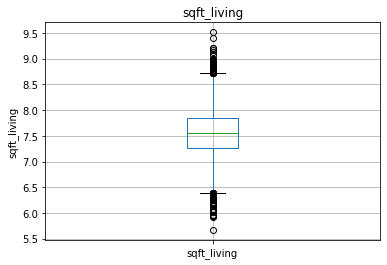

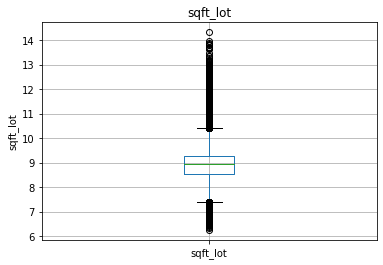

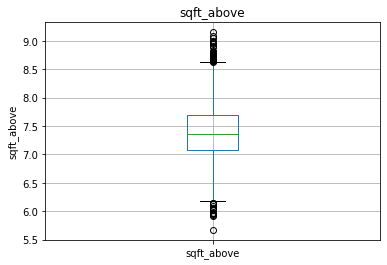

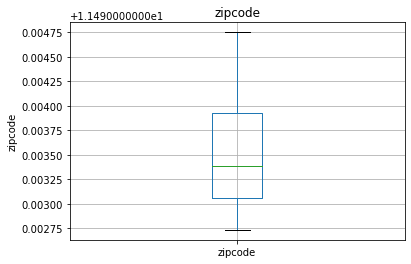

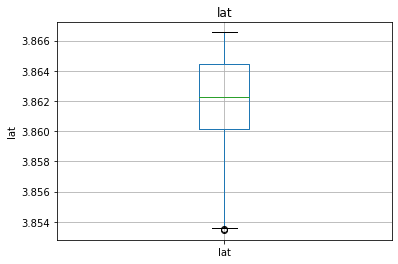

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


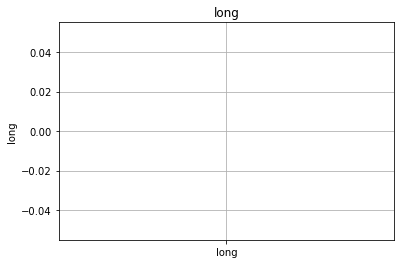

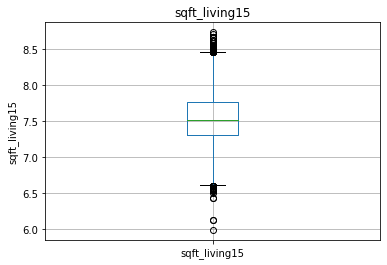

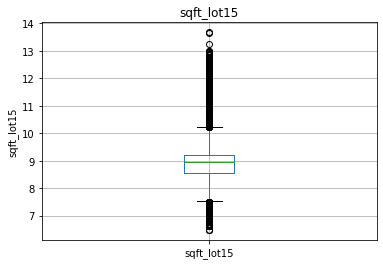

In [20]:
for feature in continuous_feature:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        if feature != 'id' and feature != 'price':
            dataset[feature]=np.log(dataset[feature])
            dataset.boxplot(column=feature)
            plt.ylabel(feature)
            plt.title(feature)
            plt.show()

In [21]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['date']

In [22]:
data[categorical_features].head()

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000


In [23]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is date and number of categories are 372


In [24]:
# for feature in categorical_features:
#     dataset=data.copy()
#     dataset.groupby(feature)['price'].median().plot.bar()
#     plt.xlabel(feature)
#     plt.ylabel('price')
#     plt.title(feature)
#     plt.show()